In [2]:
!pip install missingno


In [3]:
pip install plotly


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 17.8 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objs as go
import missingno as msno

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

import warnings 
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline

In [5]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


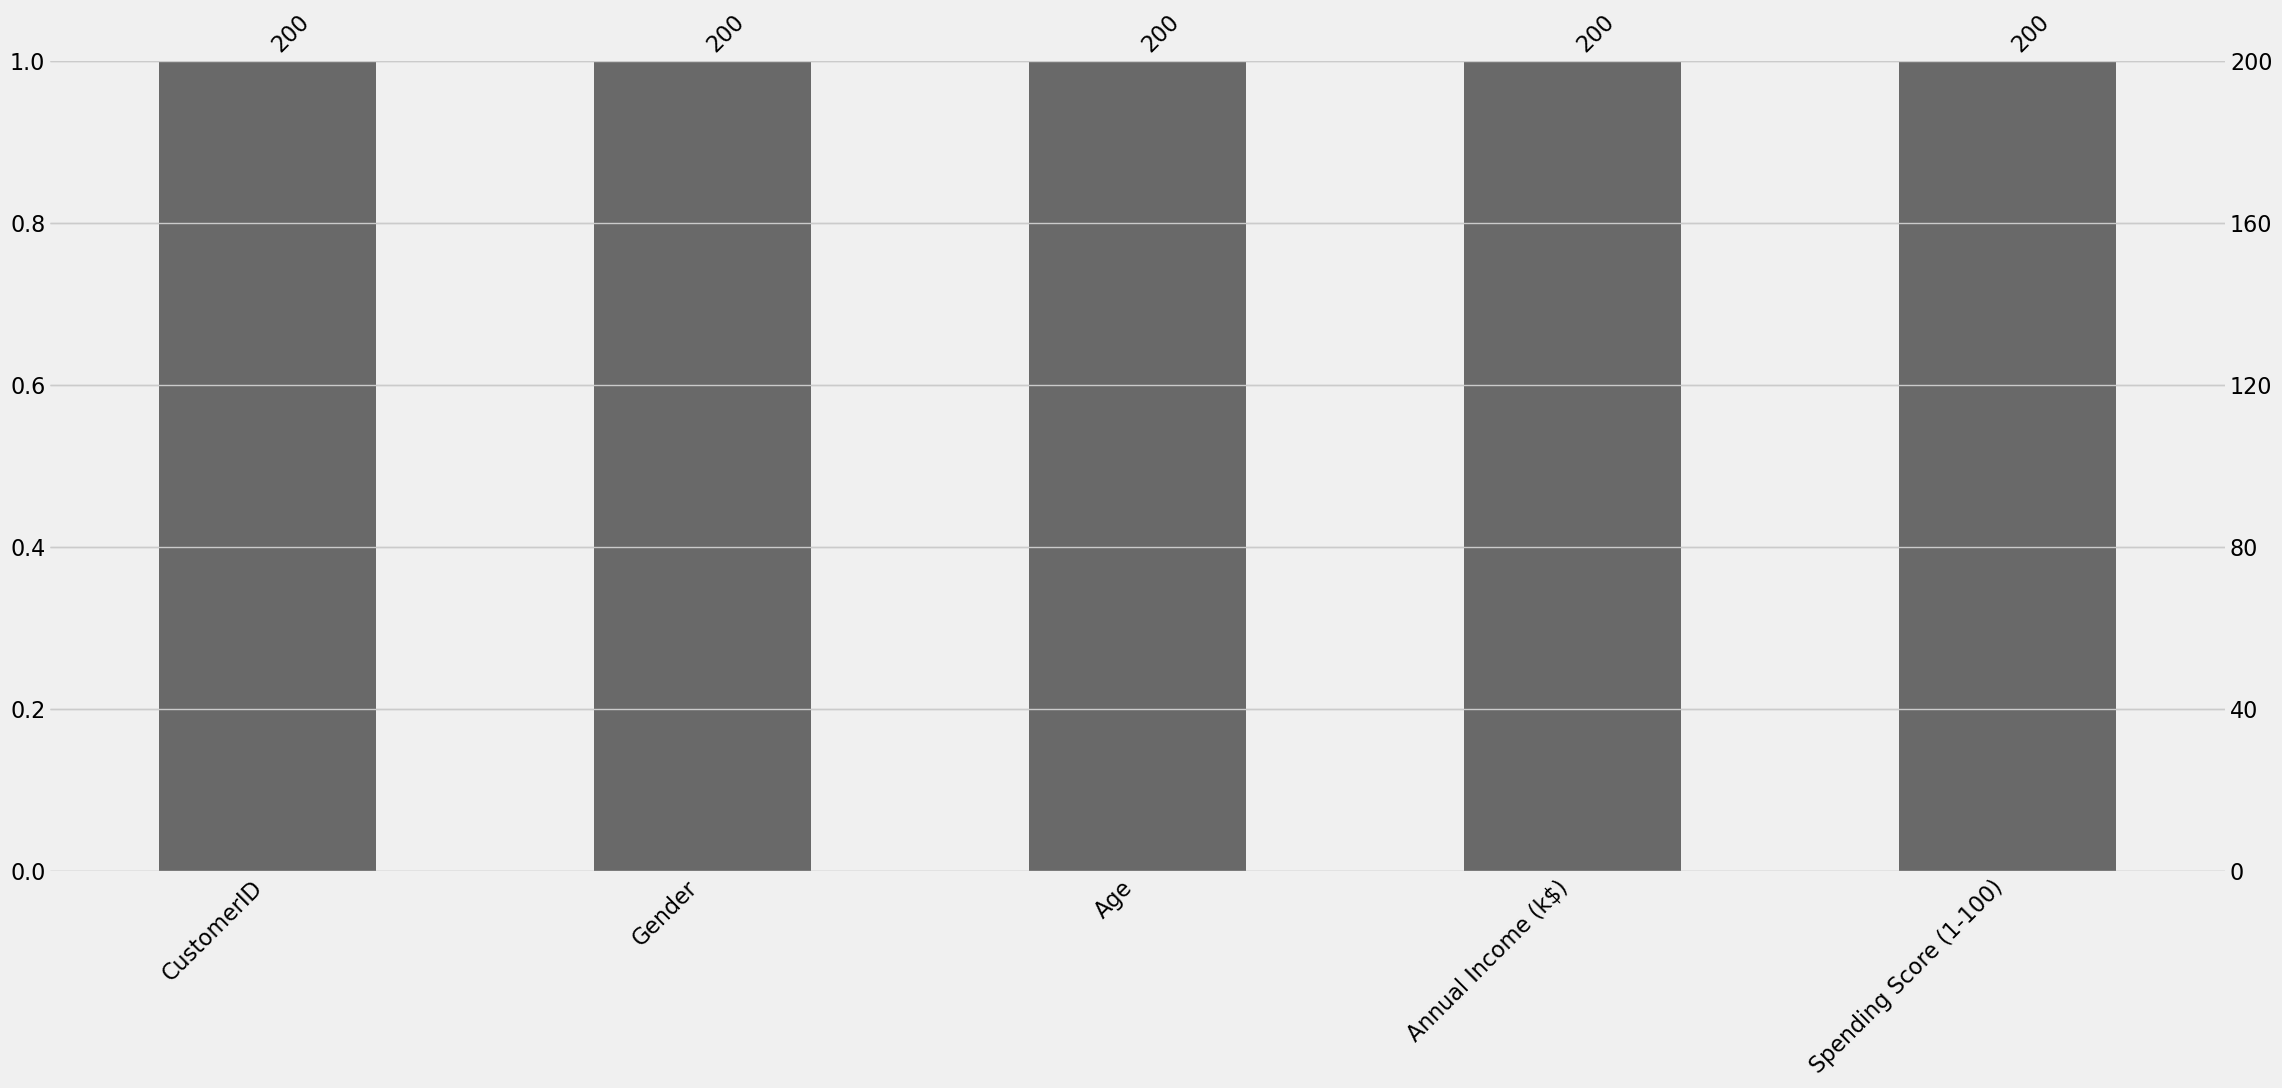

In [8]:
msno.bar(df)
plt.show()

In [9]:
df.drop('CustomerID', axis = 1, inplace = True)

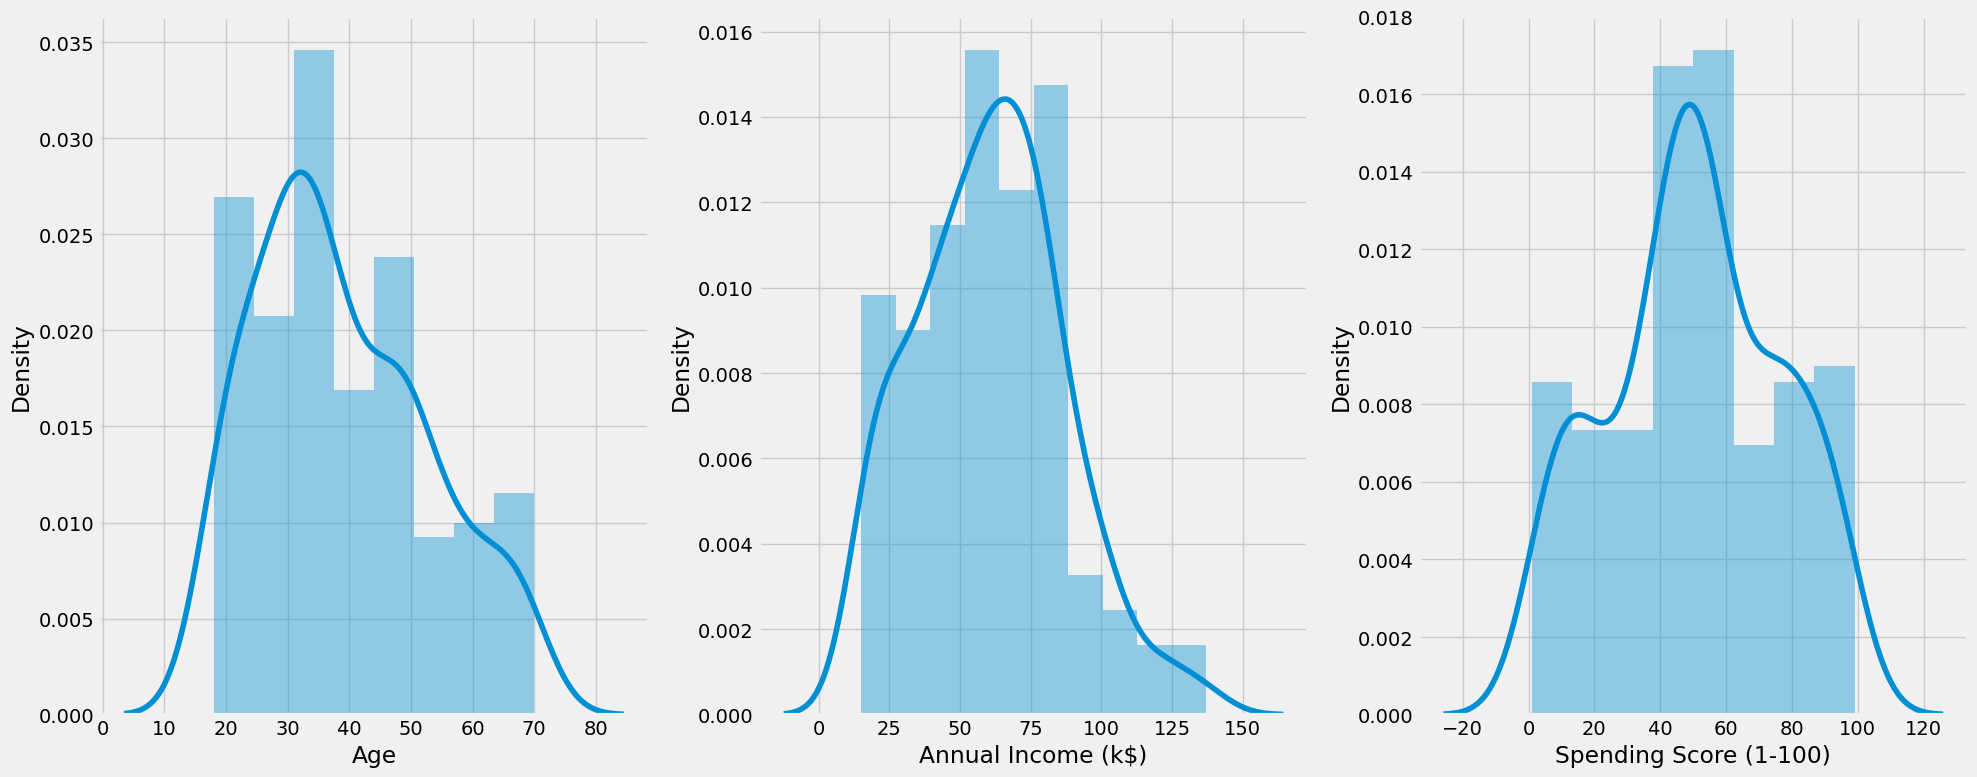

In [10]:
plt.figure(figsize = (20, 8))
plotnumber = 1

for col in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    if plotnumber <= 3:
        ax = plt.subplot(1, 3, plotnumber)
        sns.distplot(df[col])
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

### Insights dos Dados

- **Grupo etário entre 30-40 anos tem a maior densidade.**
- **A maioria dos clientes tem uma renda na faixa de 50-80k.**
- **A maioria dos clientes tem uma pontuação de gasto de 50.**

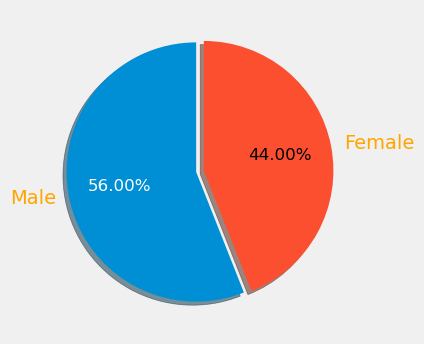

In [11]:
values = df['Gender'].value_counts()
labels = ['Male', 'Female']

fig, ax = plt.subplots(figsize = (4, 4), dpi = 100)
explode = (0, 0.06)

patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   startangle = 90, explode = explode)

plt.setp(texts, color = 'orange')
plt.setp(autotexts, size = 12, color = 'white')
autotexts[1].set_color('black')
plt.show()

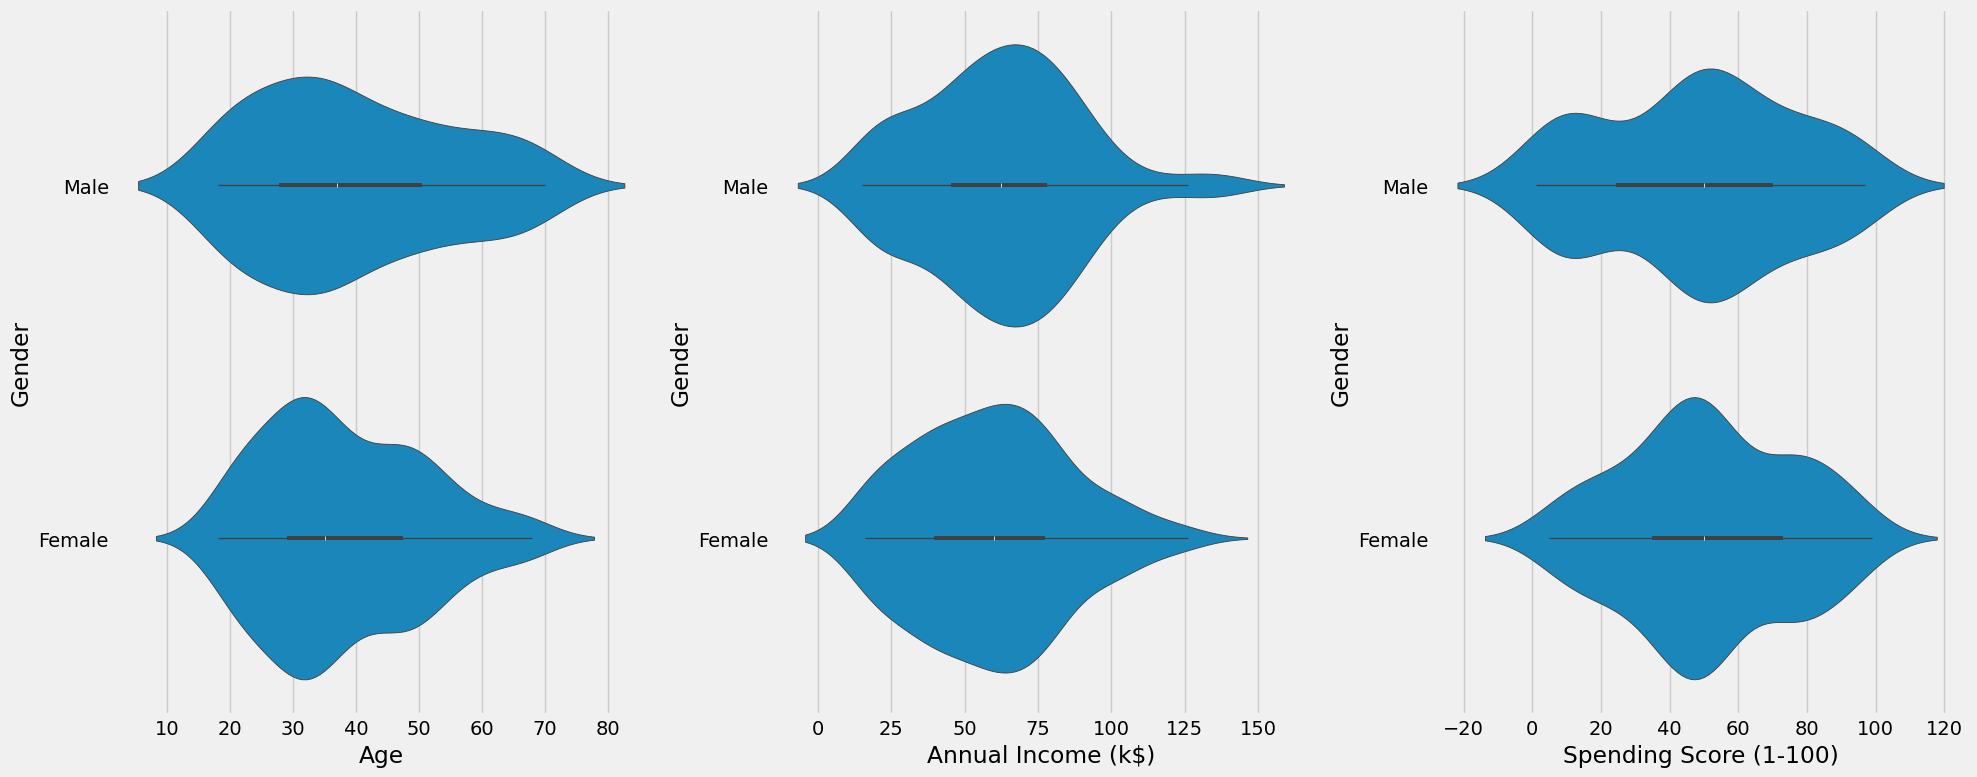

In [12]:
plt.figure(figsize = (20, 8))
plotnumber = 1

for col in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    if plotnumber <= 3:
        ax = plt.subplot(1, 3, plotnumber)
        sns.violinplot(x = col, y = 'Gender', data = df)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

In [13]:
age_18_25 = df.Age[(df.Age >= 18) & (df.Age <= 25)]
age_26_35 = df.Age[(df.Age >= 26) & (df.Age <= 35)]
age_36_45 = df.Age[(df.Age >= 36) & (df.Age <= 45)]
age_46_55 = df.Age[(df.Age >= 46) & (df.Age <= 55)]
age_55above = df.Age[df.Age >= 55]

In [14]:
import plotly.io as pio
pio.renderers.default = 'iframe'

In [15]:
x_age = ['18-25', '26-35', '36-45', '46-55', '55+']
y_age = [len(age_18_25.values), len(age_26_35.values), len(age_36_45.values), len(age_46_55.values),
     len(age_55above.values)]

px.bar(data_frame = df, x = x_age, y = y_age, color = x_age,
       title = 'Number of customers per age group')

In [16]:
px.scatter(data_frame = df, x = 'Annual Income (k$)', y = 'Spending Score (1-100)',
          title = 'Relation between Annual Income and Spending Score')


In [17]:
ss_1_20 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 1) &
                                       (df['Spending Score (1-100)'] <= 20)]

ss_21_40 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 21) &
                                       (df['Spending Score (1-100)'] <= 40)]

ss_41_60 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 41) &
                                       (df['Spending Score (1-100)'] <= 60)]

ss_61_80 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 61) &
                                       (df['Spending Score (1-100)'] <= 80)]

ss_81_100 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 81) &
                                       (df['Spending Score (1-100)'] <= 100)]

x_ss = ['1-20', '21-40', '41-60', '61-80', '81-100']
y_ss = [len(ss_1_20.values), len(ss_21_40.values), len(ss_41_60.values), len(ss_61_80.values),
        len(ss_81_100.values)]

px.bar(data_frame = df, x = x_ss, y = y_ss, color = x_ss,
       title = 'Number of customers per Spending Score group')

In [18]:
ai_0_30 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 0) & (df['Annual Income (k$)'] <= 30)]
ai_31_60 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 31)&(df['Annual Income (k$)'] <= 60)]
ai_61_90 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 61)&(df['Annual Income (k$)'] <= 90)]
ai_91_120 = df['Annual Income (k$)'][(df['Annual Income (k$)']>= 91)&(df['Annual Income (k$)']<=120)]
ai_121_150 = df['Annual Income (k$)'][(df['Annual Income (k$)']>=121)&(df['Annual Income (k$)']<=150)]

x_ai = ['$ 0-30,000', '$ 30,001-60,000', '$ 60,001-90,000', '$ 90,001-120,000', '$ 120,000-150,000']
y_ai = [len(ai_0_30.values) , len(ai_31_60.values) , len(ai_61_90.values) , len(ai_91_120.values),
         len(ai_121_150.values)]

px.bar(data_frame = df, x = x_ai, y = y_ai, color = x_ai,
       title = 'Number of customers per Annual Income group')

X1 = df.loc[:,['Age','Spending Score (1-100)' ]].values
wcss= []
for k in range (1,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize = (12,7))
plt.plot(range(1,11),wcss,linewidth=2, marker=8)
plt.title("Plot Cotovelo",fontsize=20)
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

In [33]:
kmeans = KMeans(n_clusters=4)
result = kmeans.fit_predict(X1)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

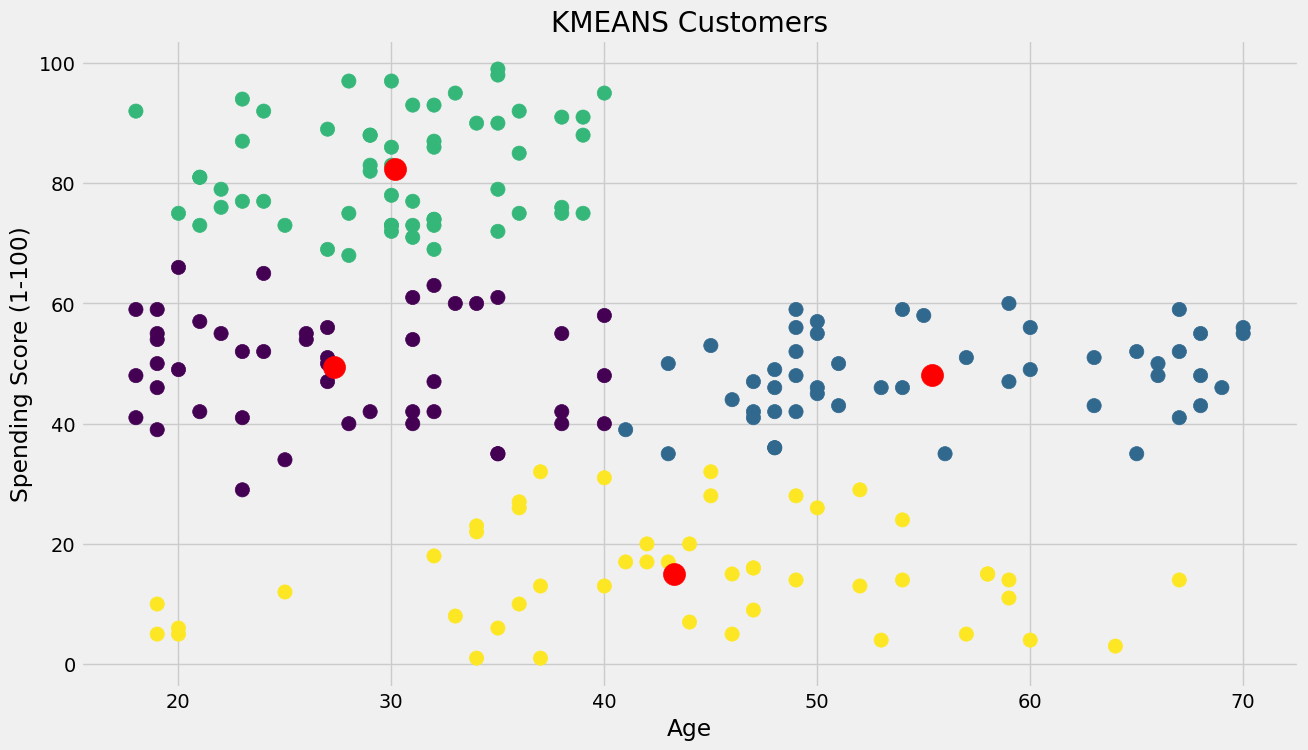

In [35]:
plt.figure(figsize = (14,8))
plt.scatter(X1[:,0],X1[:,1], c=labels, s=105)
plt.scatter(centers[:,0], centers[:,1], color='red', s=250)
plt.title('KMEANS Customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()




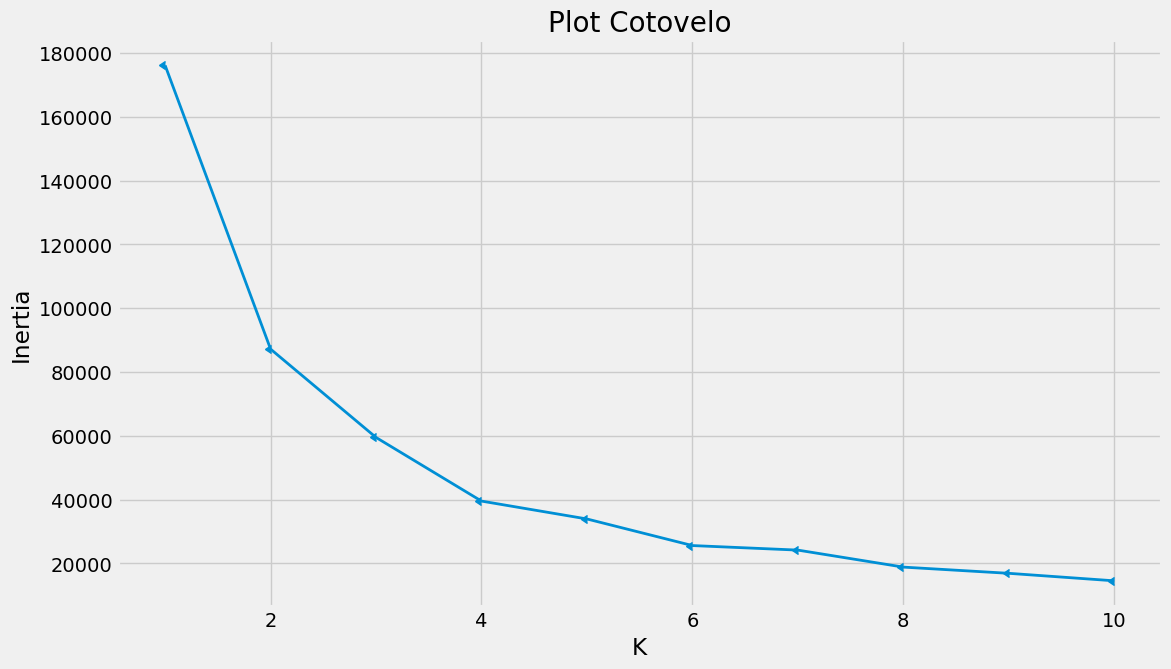

In [42]:
X2 = df.loc[:,['Age', 'Annual Income (k$)' ]].values
wcss= []
for k in range (1,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize = (12,7))
plt.plot(range(1,11),wcss,linewidth=2, marker=8)
plt.title("Plot Cotovelo",fontsize=20)
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

In [43]:
kmeans = KMeans(n_clusters=5)
result = kmeans.fit_predict(X2)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

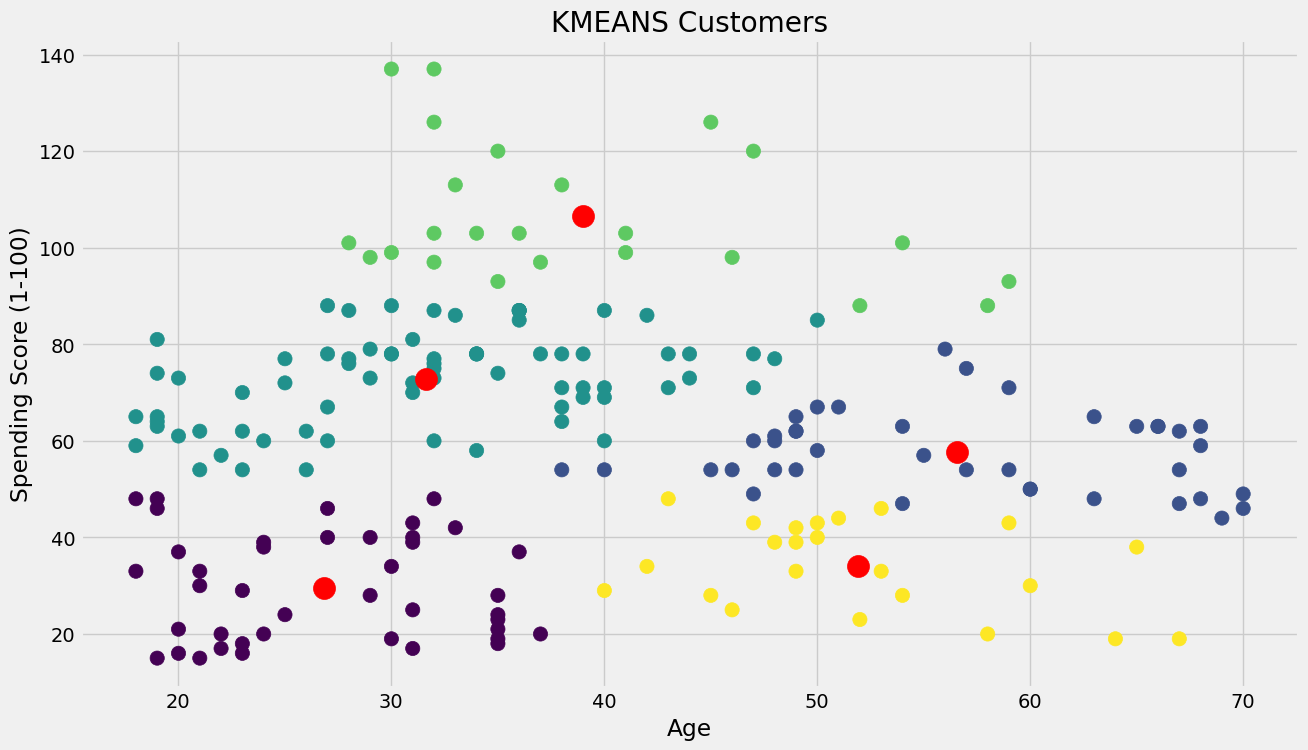

In [44]:
plt.figure(figsize = (14,8))
plt.scatter(X2[:,0],X2[:,1], c=labels, s=105)
plt.scatter(centers[:,0], centers[:,1], color='red', s=250)
plt.title('KMEANS Customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

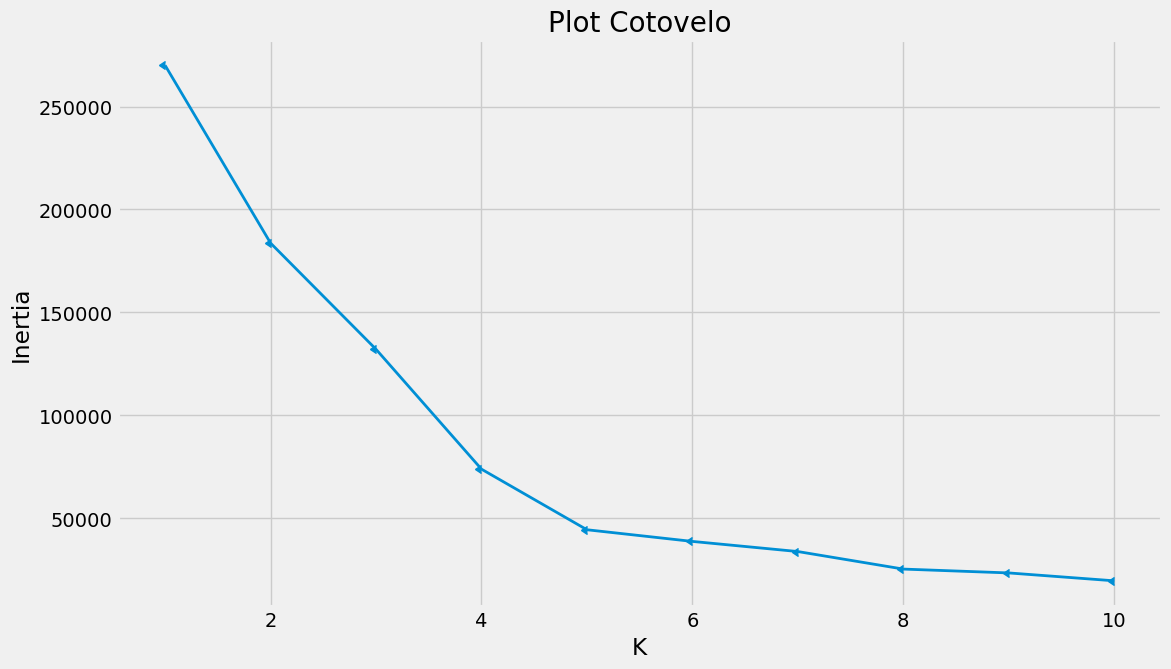

In [46]:
X3 = df.loc[:,['Annual Income (k$)','Spending Score (1-100)'  ]].values
wcss= []
for k in range (1,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)
plt.figure(figsize = (12,7))
plt.plot(range(1,11),wcss,linewidth=2, marker=8)
plt.title("Plot Cotovelo",fontsize=20)
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

In [47]:
kmeans = KMeans(n_clusters=5)
result = kmeans.fit_predict(X3)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

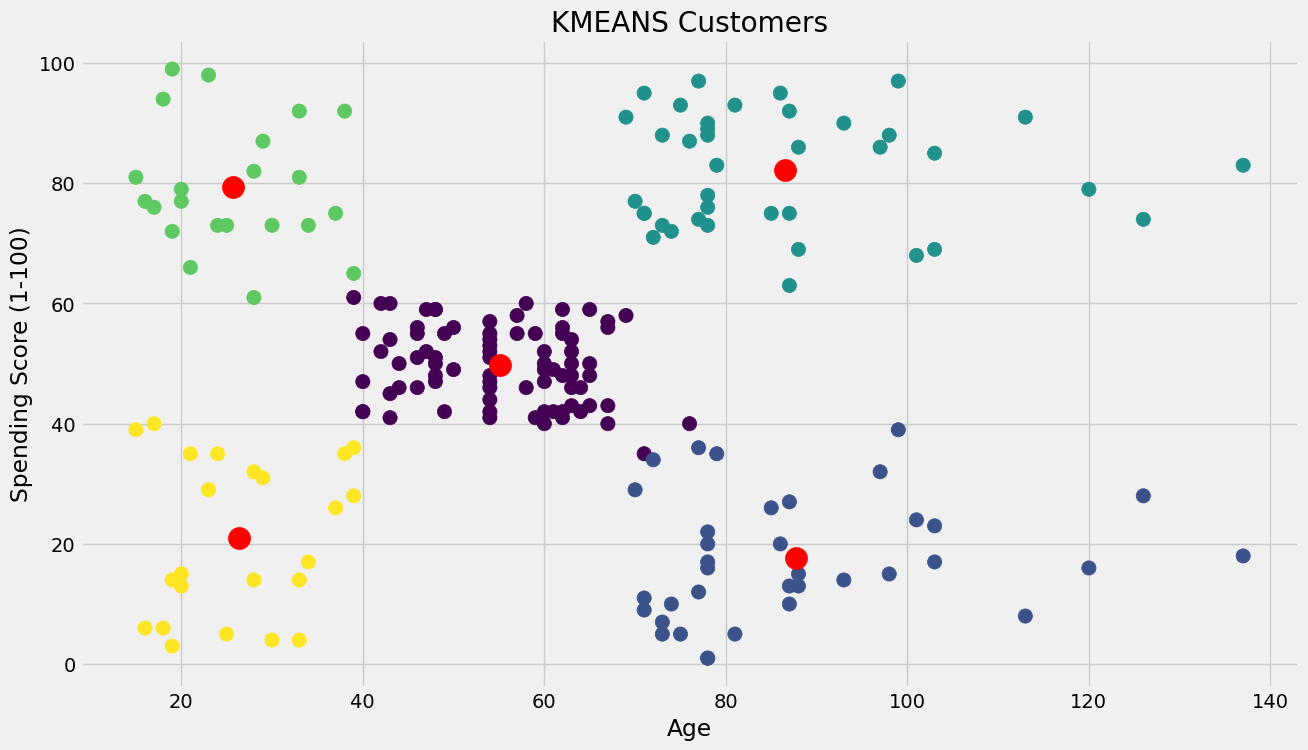

In [48]:
plt.figure(figsize = (14,8))
plt.scatter(X3[:,0],X3[:,1], c=labels, s=105)
plt.scatter(centers[:,0], centers[:,1], color='red', s=250)
plt.title('KMEANS Customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

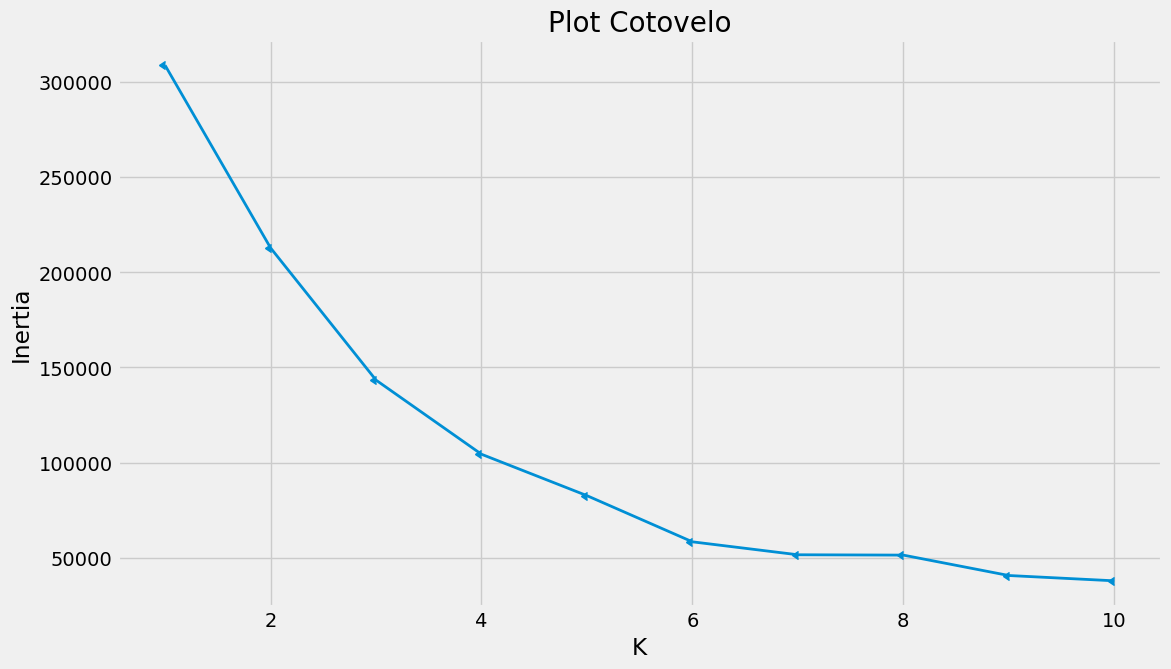

In [50]:
X4 = df.iloc[:,1:]
wcss= []
for k in range (1,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X4)
    wcss.append(kmeans.inertia_)
plt.figure(figsize = (12,7))
plt.plot(range(1,11),wcss,linewidth=2, marker=8)
plt.title("Plot Cotovelo",fontsize=20)
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

In [51]:
kmeans = KMeans(n_clusters=6)
result = kmeans.fit_predict(X4)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

In [56]:
fig = px.scatter_3d(X4,x='Annual Income (k$)',y='Spending Score (1-100)',z='Age', color=labels)
fig.show()


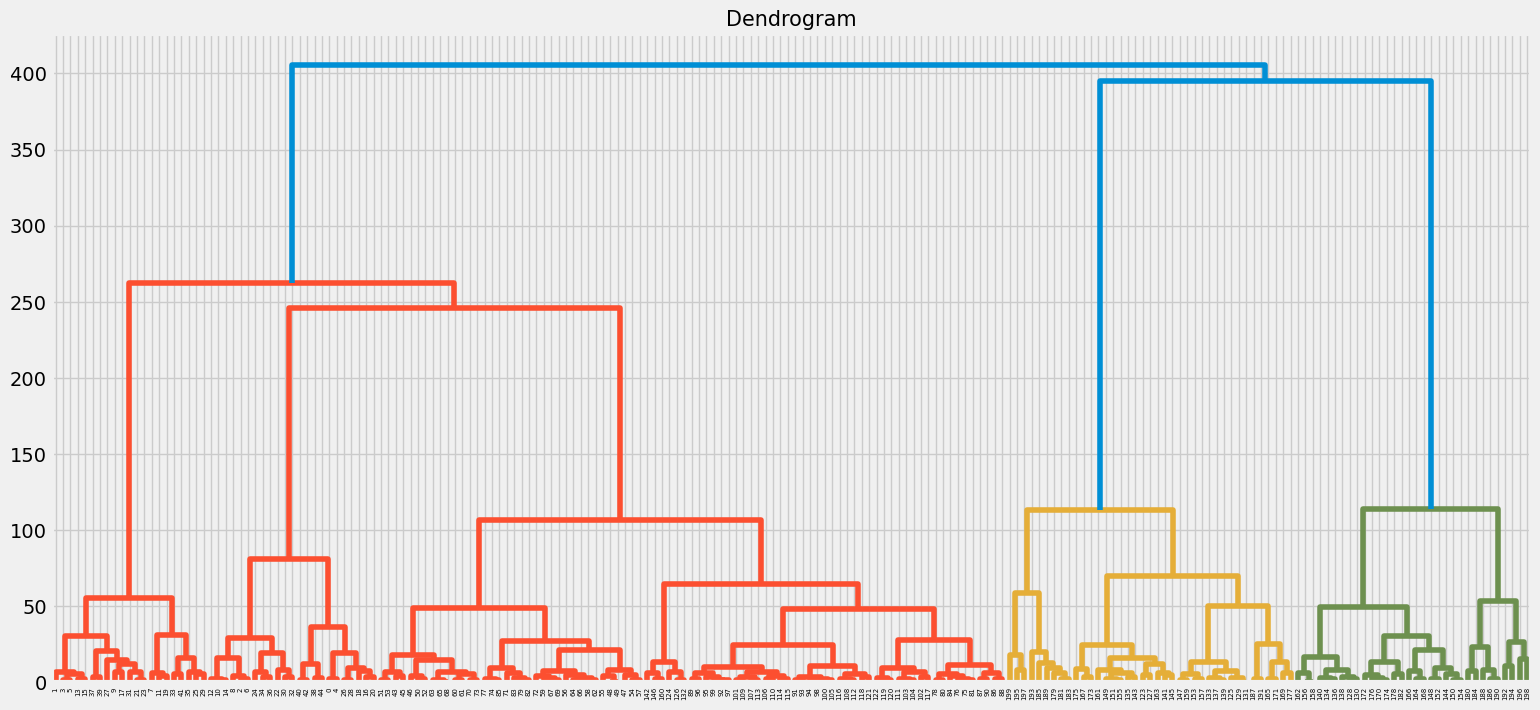

In [57]:
plt.figure(figsize=(17,8))
dendro = dendrogram(linkage(X3, method='ward'))
plt.title('Dendrogram', fontsize=15)
plt.show()

In [58]:
agc = AgglomerativeClustering(n_clusters=5, linkage='ward')
labels = agc.fit_predict(X3)

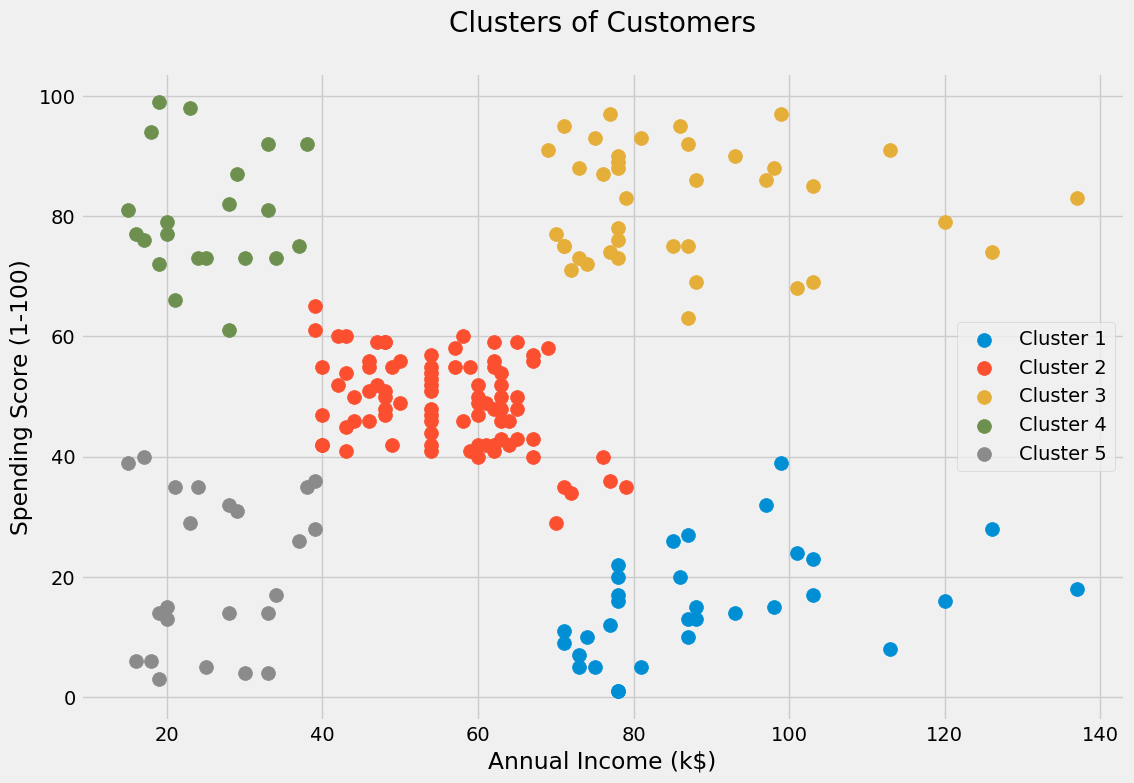

In [59]:
plt.figure(figsize = (12, 8))

plt.scatter(X3[labels == 0,0], X3[labels == 0,1], label = 'Cluster 1', s = 100)
plt.scatter(X3[labels == 1,0], X3[labels == 1,1], label = 'Cluster 2', s = 100)
plt.scatter(X3[labels == 2,0], X3[labels == 2,1], label = 'Cluster 3', s = 100)
plt.scatter(X3[labels == 3,0], X3[labels == 3,1], label = 'Cluster 4', s = 100)
plt.scatter(X3[labels == 4,0], X3[labels == 4,1], label = 'Cluster 5', s = 100)

plt.legend(loc = 'best')
plt.title('Clusters of Customers\n ', fontsize = 20)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [60]:
from sklearn.neighbors import NearestNeighbors


In [63]:
k = 4
neighbors = NearestNeighbors(n_neighbors=k)
neighbors.fit(X3)
distances, indices = neighbors.kneighbors(X3)

In [64]:
distances = np.sort(distances[:,k-1],axis=0)

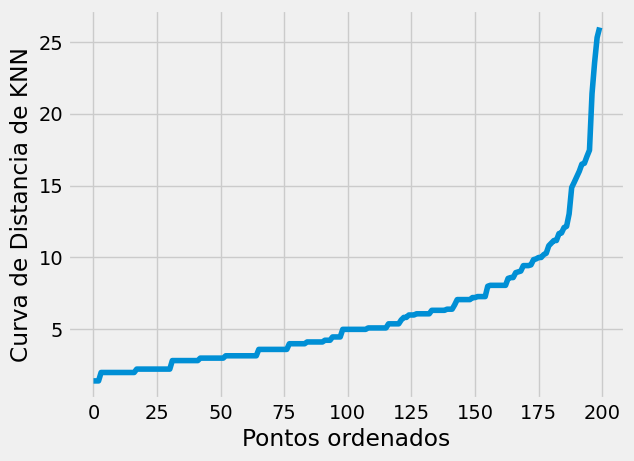

In [65]:
plt.plot(distances)
plt.xlabel("Pontos ordenados")
plt.ylabel("Curva de Distancia de KNN")
plt.show()

In [98]:
min_points = 5
epsilon = 9

In [99]:
db = DBSCAN(eps=epsilon, min_samples=min_points).fit(X3)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)  
core_samples_mask[db.core_sample_indices_] = True  #Setando os indices das core region para true
labels = db.labels_

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)


In [100]:
print('Numero de Clusters: %d' %  n_clusters )
print('Numero de Noise Points: %d ' %  n_noise )



Numero de Clusters: 6
Numero de Noise Points: 23 


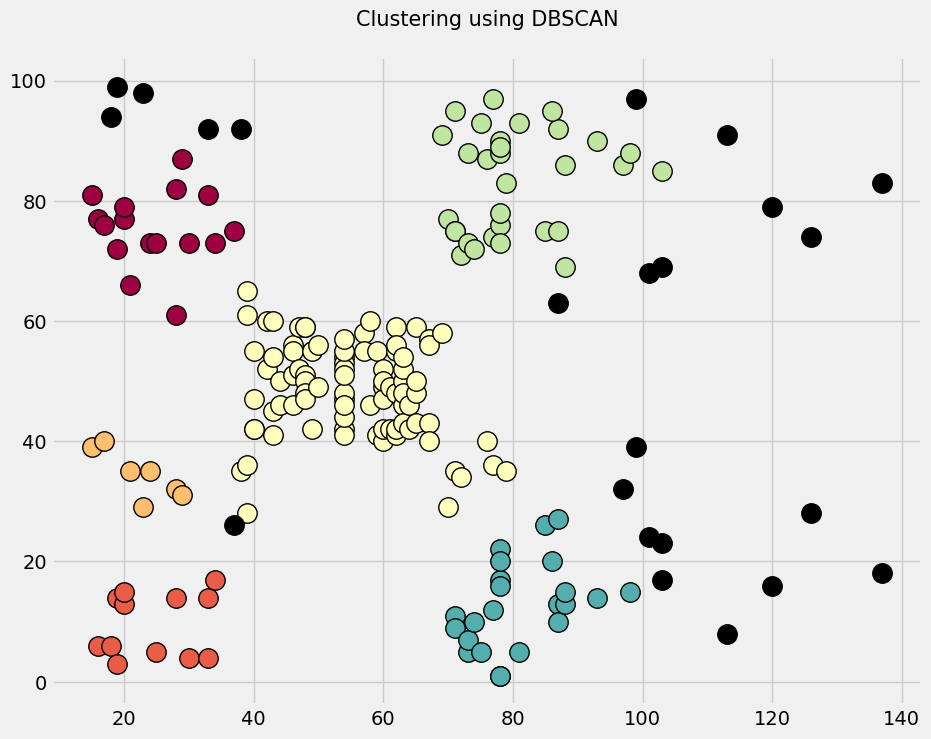

In [101]:
plt.figure(figsize = (10, 8))

# Black  is used for noise.
unique_labels = set(labels)  # identifying all the unique labels/clusters
colors = [plt.cm.Spectral(each)
          # creating the list of colours, generating the colourmap
          for each in np.linspace(0, 1, len(unique_labels))]  

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
    class_member_mask = (labels == k)   # assigning class members for each class
    xy = X3[class_member_mask & core_samples_mask] # creating the list of points for each class  
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),markeredgecolor='k', markersize=14)
    xy = X3[class_member_mask & ~core_samples_mask] # creating the list of noise points   
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)
    
plt.title('Clustering using DBSCAN\n', fontsize = 15)
plt.show()